MİNE ERGİN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import gzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/women_who_have_been_murdered_in_turkey.csv"
df = pd.read_csv(path, dtype={'age': str})

print("number of rows:", df.shape[0])
print("number of columns:", df.shape[1])


number of rows: 3111
number of columns: 14


In [ ]:
# deleting irrelevant locations
cities_to_delete = ['Almanya', 'Ukrayna', 'Kibris', 'Gurcistan', 'Corlu', 'Tespit Edilemeyen']

df = df[~df['city'].isin(cities_to_delete)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3110
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3106 non-null   int64  
 1   city             1926 non-null   object 
 2   age              1315 non-null   object 
 3   date             3106 non-null   object 
 4   protectionorder  3104 non-null   object 
 5   why1             3105 non-null   object 
 6   why2             70 non-null     object 
 7   killer1          3102 non-null   object 
 8   killer2          14 non-null     object 
 9   killingway1      3106 non-null   object 
 10  killingway2      70 non-null     object 
 11  killingway3      6 non-null      object 
 12  statusofkiller   1763 non-null   object 
 13  year             3106 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 364.0+ KB


In [ ]:
for column in df.columns:
  print(column)

id
city
age
date
protectionorder
why1
why2
killer1
killer2
killingway1
killingway2
killingway3
statusofkiller
year


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
if duplicate_rows.any():
    print("Duplicate rows found!")
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [ ]:
df.head()

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Resit,01/02/2008,Tespit Edilemeyen,Erkegin istedigi bir seyin gerceklesmemesi seb...,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2008.0
1,2,Adana,NaN,01/12/2008,Yok,Tespit Edilemeyen,NaN,Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008.0
2,3,Adana,Resit Degil,01/02/2008,Yok,Tespit Edilemeyen,NaN,Babasi,NaN,Darp,NaN,NaN,Tutuklu,2008.0
3,4,Adana,NaN,01/04/2008,Yok,Tespit Edilemeyen,NaN,Eski Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008.0
4,5,Ankara,NaN,01/12/2008,Tespit Edilemeyen,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,NaN,Tespit Edilemeyen,2008.0


In [ ]:
df.describe(include='all')

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
count,3106.000000,1926,1315,3106,3104,3105,70,3102,14,3106,70,6,1763,3106.000000
unique,NaN,157,13,2038,16,103,21,70,10,21,16,6,27,NaN
top,NaN,Istanbul,Resit,09/12/2018,Yok,Tespit Edilemeyen,Tartisma,Kocasi,Erkek Kardesi,Atesli Silah,Darp,Kesici Alet,Tutuklu,NaN
freq,NaN,239,857,7,2381,1123,17,1029,5,1431,18,1,845,NaN
mean,1553.804250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.693179
std,897.276818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.274132
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014000
25%,777.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000
50%,1553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
75%,2329.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000


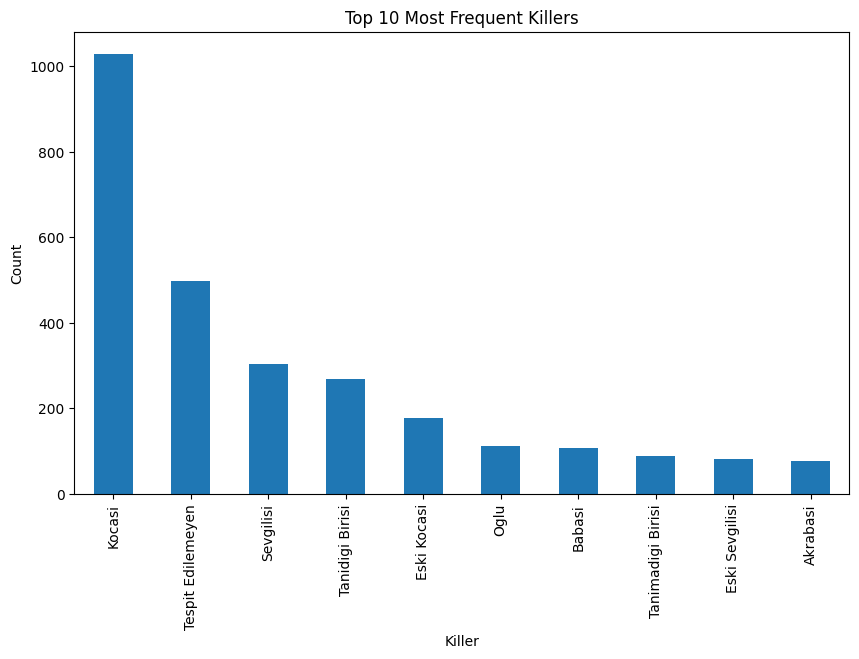

In [ ]:
killer_counts = df['killer1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
killer_counts.plot.bar()
plt.xlabel('Killer')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Killers')
plt.show()


In [ ]:
all_cities = []
for index, row in df.iterrows():
    cities = row['city']
    if isinstance(cities, str):
        cities = cities.split(',')
        for city in cities:
            all_cities.append(city.strip()) 

city_counts = pd.Series(all_cities).value_counts()
most_common_city = city_counts.index[0]
city_count = city_counts.iloc[0]

print("The most common city is " + most_common_city + " with " + str(city_count) + " occurrences.")


The most common city is Istanbul with 296 occurrences.


In [ ]:
filtered_df = df[(df['killer1'] == 'Kocasi') ]

print(filtered_df)


        id        city      age          date         protectionorder  \
0        1      Adana     Resit    01/02/2008     Tespit Edilemeyen     
6        7    Antalya     Resit   03/02/2008       Tespit Edilemeyen    
10      11     Bingol    Resit    04/03/2008                     Yok    
11      12      Bursa       NaN   04/09/2008                     Yok    
13      14      Bursa       NaN   05/02/2008                     Yok    
...    ...         ...      ...           ...                     ...   
3098  3103     Kayseri    Resit    18/12/2012                     Yok   
3099  3104  Diyarbakir    Resit    31/12/2012                     Yok   
3104  3109       Izmir    Resit    05/02/2013                     Yok   
3106  3111         Van    Resit    19/01/2013                     Yok   
3107  3112    Istanbul    Resit    22/01/2013                     Var   

                                                   why1 why2 killer1 killer2  \
0     Erkegin istedigi bir seyin gerceklesm

In [ ]:
df['city'] = df['city'].str.strip()
df['city'] = df['city'].replace('Kastomonu', 'Kastamonu')
df['city'] = df['city'].replace('Çorlu', 'Corlu')

In [ ]:
city_column = df['city']

city_list = city_column.tolist()

unique_cities = list(set(city_list))

    

In [ ]:
def get_region(city):
    city = str(city).strip()

    if city in ['Adana', 'Mersin', 'Antalya', 'Hatay', 'Burdur', 'Osmaniye', 'Kahramanmaras']:
        return 'Akdeniz'
    elif city in ['Ankara', 'Konya', 'Eskisehir', 'Aksaray', 'Kirikkale', 'Kirsehir', 'Nevsehir', 'Karaman', 'Kayseri', 'Sivas', 'Cankiri', 'Yozgat']:
        return 'Ic Anadolu'
    elif city in ['Agri', 'Van', 'Bingol', 'Bitlis', 'Mus', 'Sirnak', 'Igdir', 'Ardahan', 'Kars', 'Erzurum', 'Erzincan', 'Tunceli', 'Elazig', 'Malatya', 'Hakkari']:
        return 'Dogu Anadolu'
    elif city in ['Gaziantep', 'Adiyaman', 'Sanliurfa', 'Kilis', 'Diyarbakir', 'Siirt', 'Batman', 'Mardin']:
        return 'Guneydogu Anadolu'
    elif city in ['Istanbul', 'Bursa', 'Balikesir', 'Canakkale', 'Tekirdag', 'Sakarya', 'Edirne', 'Bilecik', 'Kocaeli', 'Yalova']:
        return 'Marmara'
    elif city in ['Izmir', 'Aydin', 'Mugla', 'Manisa', 'Denizli', 'Usak', 'Afyonkarahisar', 'Kutahya']:
        return 'Ege'
    elif city in ['Trabzon', 'Rize', 'Artvin', 'Giresun', 'Samsun', 'Ordu', 'Tokat', 'Sinop', 'Karabuk', 'Zonguldak', 'Bartin', 'Duzce', 'Kastamonu', 'Amasya', 'Gumushane', 'Bayburt', 'Corum']:
        return 'Karadeniz'
    else:
        return 'Unknown'



df['region'] = df['city'].apply(get_region)

#df.head()


## Q3: Visualization and Analysis

Visualization of the information discovered in the first part of the project


Selenay Buse Batıbay

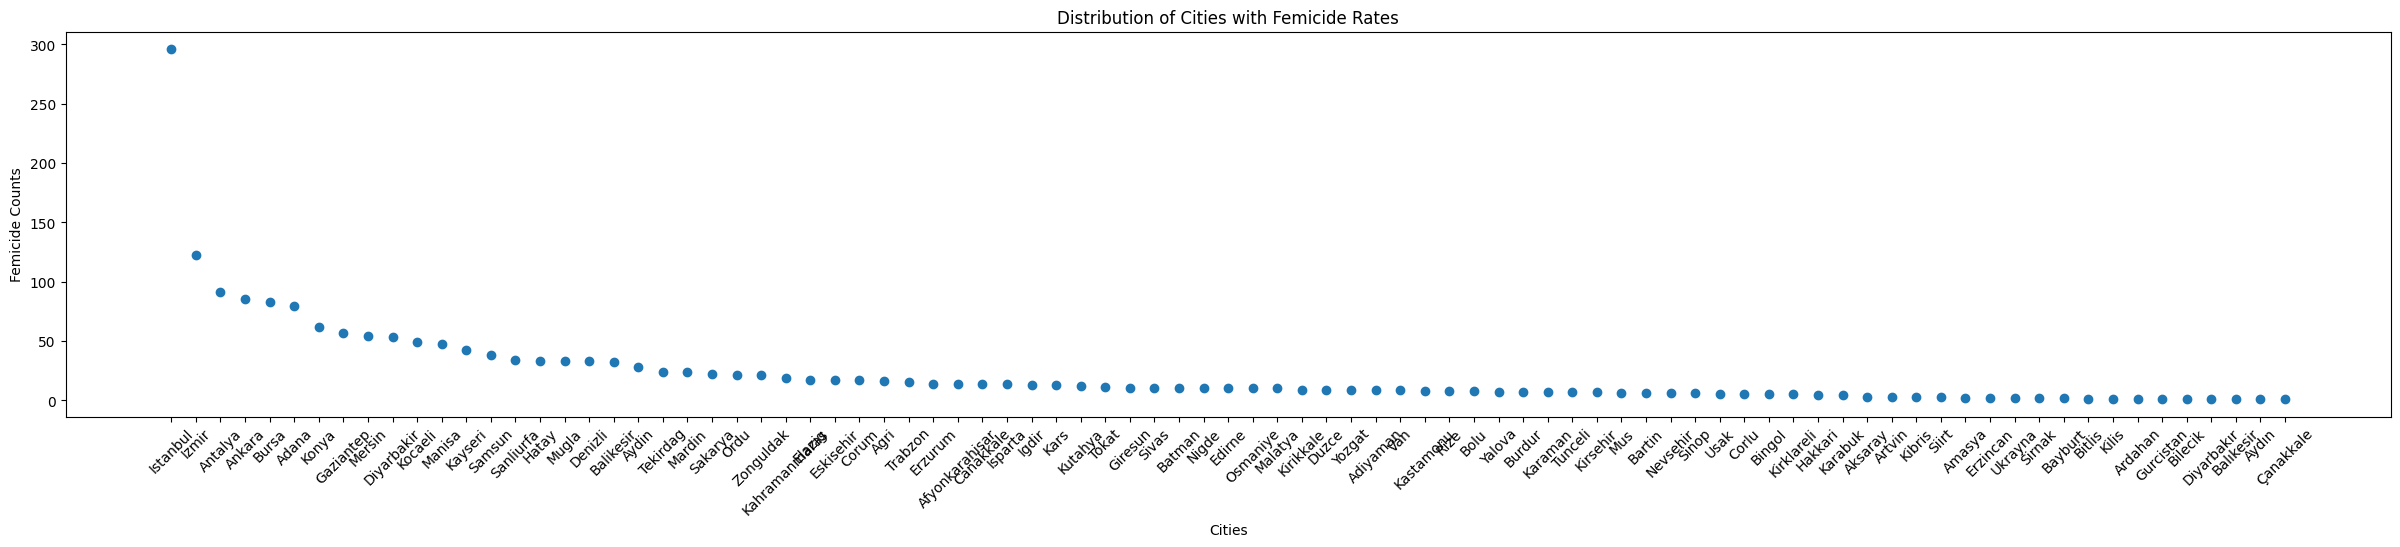

In [ ]:
# distribution of the cities that has the most femicide rate
city_counts = df['city'].value_counts()
plt.figure(figsize=(30, 5))
plt.scatter(city_counts.index, city_counts.values)
plt.xlabel('Cities')
plt.ylabel('Femicide Counts')
plt.title('Distribution of Cities with Femicide Rates')
plt.xticks(rotation=45)
plt.show()

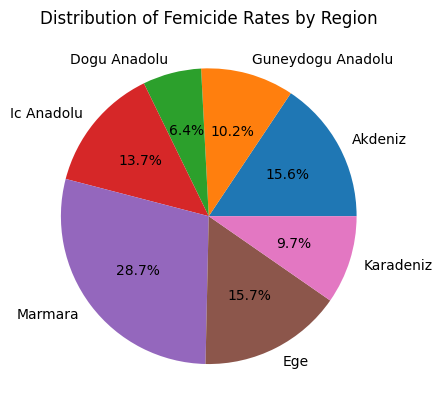

In [ ]:
# distribution of the regions that has the most femicide rates with a pie chart

akdeniz_femicides_percentage = (df[df['region'] == 'Akdeniz'].shape[0] / df.shape[0]) * 100

guneydogu_anadolu_femicides_percentage = (df[df['region'] == 'Guneydogu Anadolu'].shape[0] / df.shape[0]) * 100

dogu_anadolu_femicides_percentage = (df[df['region'] == 'Dogu Anadolu'].shape[0] / df.shape[0]) * 100

ic_anadolu_femicides_percentage = (df[df['region'] == 'Ic Anadolu'].shape[0] / df.shape[0]) * 100

marmara_femicides_percentage = (df[df['region'] == 'Marmara'].shape[0] / df.shape[0]) * 100

ege_femicides_percentage = (df[df['region'] == 'Ege'].shape[0] / df.shape[0]) * 100

karadeniz_femicides_percentage = (df[df['region'] == 'Karadeniz'].shape[0] / df.shape[0]) * 100

femicide_percentages = [
    akdeniz_femicides_percentage,
    guneydogu_anadolu_femicides_percentage,
    dogu_anadolu_femicides_percentage,
    ic_anadolu_femicides_percentage,
    marmara_femicides_percentage,
    ege_femicides_percentage,
    karadeniz_femicides_percentage
]

regions = ['Akdeniz', 'Guneydogu Anadolu', 'Dogu Anadolu', 'Ic Anadolu', 'Marmara', 'Ege', 'Karadeniz']

plt.pie(femicide_percentages, labels=regions, autopct='%1.1f%%')

plt.title('Distribution of Femicide Rates by Region')

plt.show()


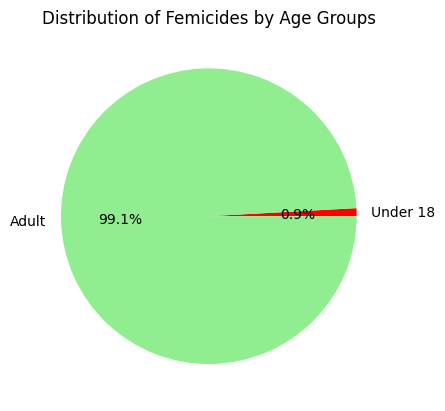


According to the pie chart, most of the femicides's victims are adult women in Turkey.


In [ ]:
# distribution of femicides according to age
under_18_count = df[df['age'] == 'Resit Degil'].shape[0]
under_18_percentage = (under_18_count / df.shape[0]) * 100
adult_percentage = 100 - under_18_percentage

labels = ['Under 18', 'Adult']

sizes = [under_18_percentage, adult_percentage]

colors = ['red', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Femicides by Age Groups')

plt.show()

print("\nAccording to the pie chart, most of the femicides's victims are adult women in Turkey.")

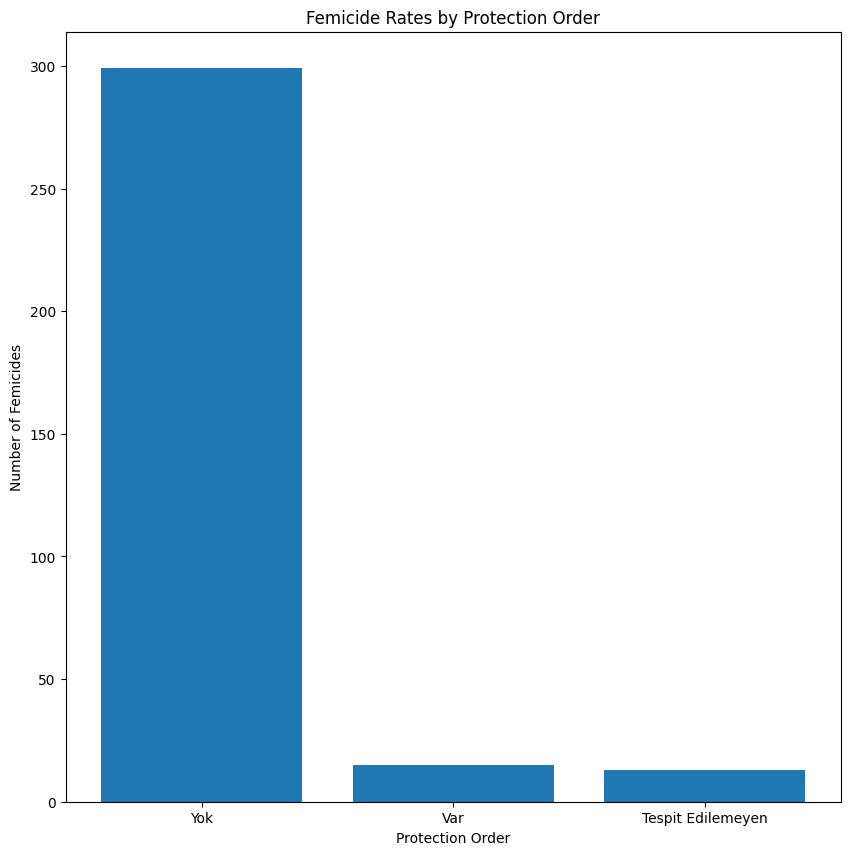


Most of the women who were killed did not request a protection order before being killed.


In [ ]:
# distribution of femicides according to protection order

yok_count = df[df['protectionorder'] == 'Yok'].shape[0]
var_count = df[df['protectionorder'] == 'Var'].shape[0]
tespit_count = df[df['protectionorder'] == 'Tespit Edilemeyen'].shape[0]

# Define the protection order labels
x_labels = ['Yok', 'Var', 'Tespit Edilemeyen']

# Define the number of femicides for each protection order
femicide_counts = [yok_count, var_count, tespit_count]

plt.figure(figsize=(10, 10))

# Create the bar plot
plt.bar(x_labels, femicide_counts)

# Add labels and title
plt.xlabel('Protection Order')
plt.ylabel('Number of Femicides')
plt.title('Femicide Rates by Protection Order')

# Display the plot
plt.show()

print("\nMost of the women who were killed did not request a protection order before being killed.")

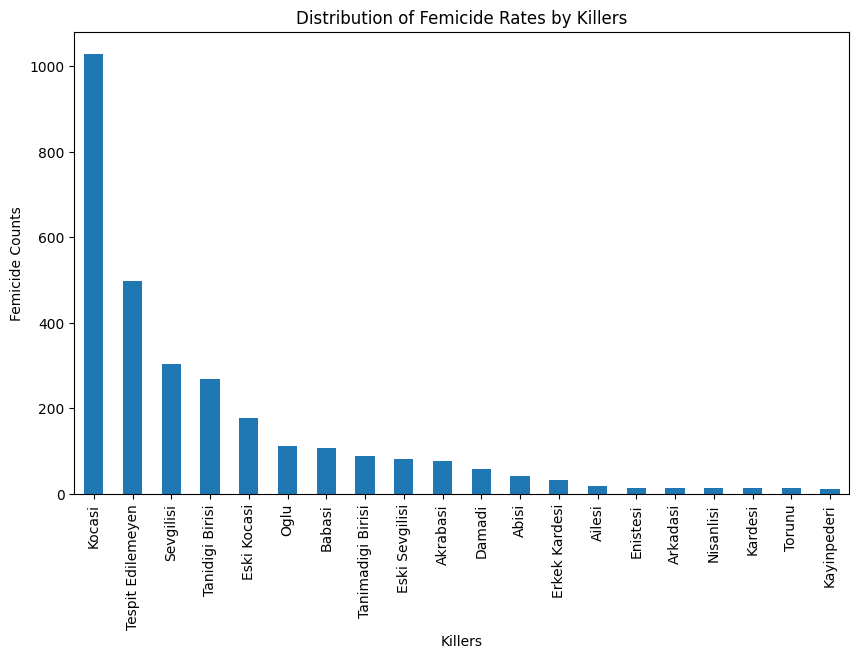

In [ ]:
# distribution of the killers
killers = df['killer1'].value_counts().head(20)
plt.figure(figsize=(10, 6))
killers.plot.bar()
plt.xlabel('Killers')
plt.ylabel('Femicide Counts')
plt.title('Distribution of Femicide Rates by Killers')
plt.show()


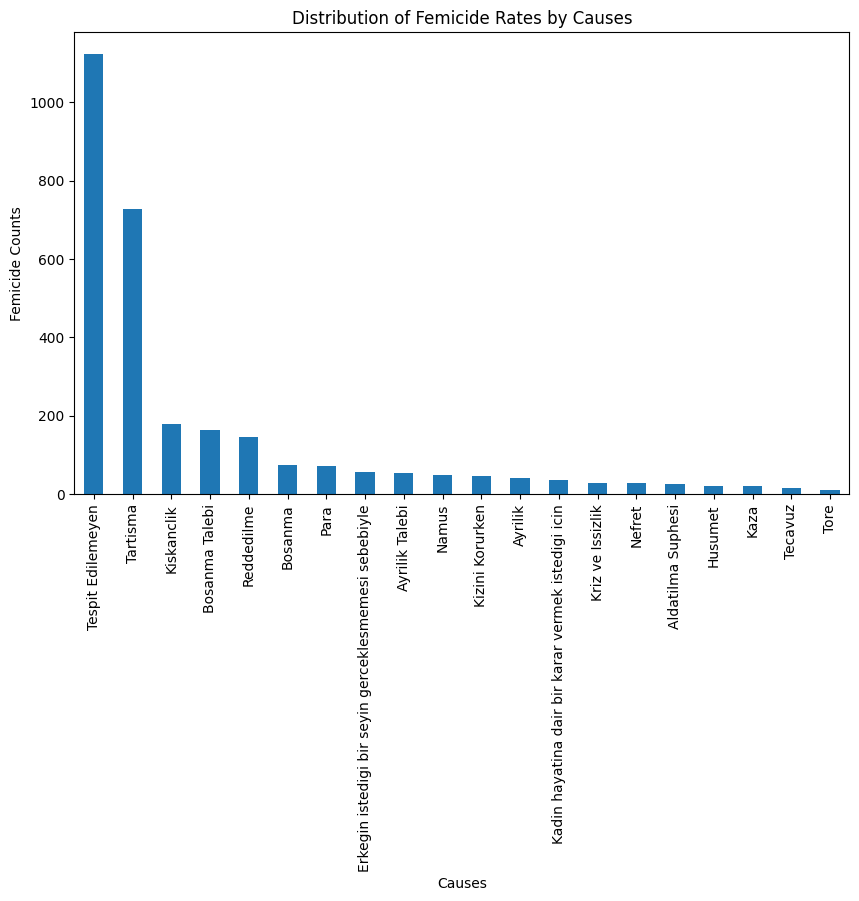

In [253]:
# distribution of the causes
causes = df['why1'].value_counts().head(20)
plt.figure(figsize=(10, 6))
causes.plot.bar()
plt.xlabel('Causes')
plt.ylabel('Femicide Counts')
plt.title('Distribution of Femicide Rates by Causes')
plt.show()


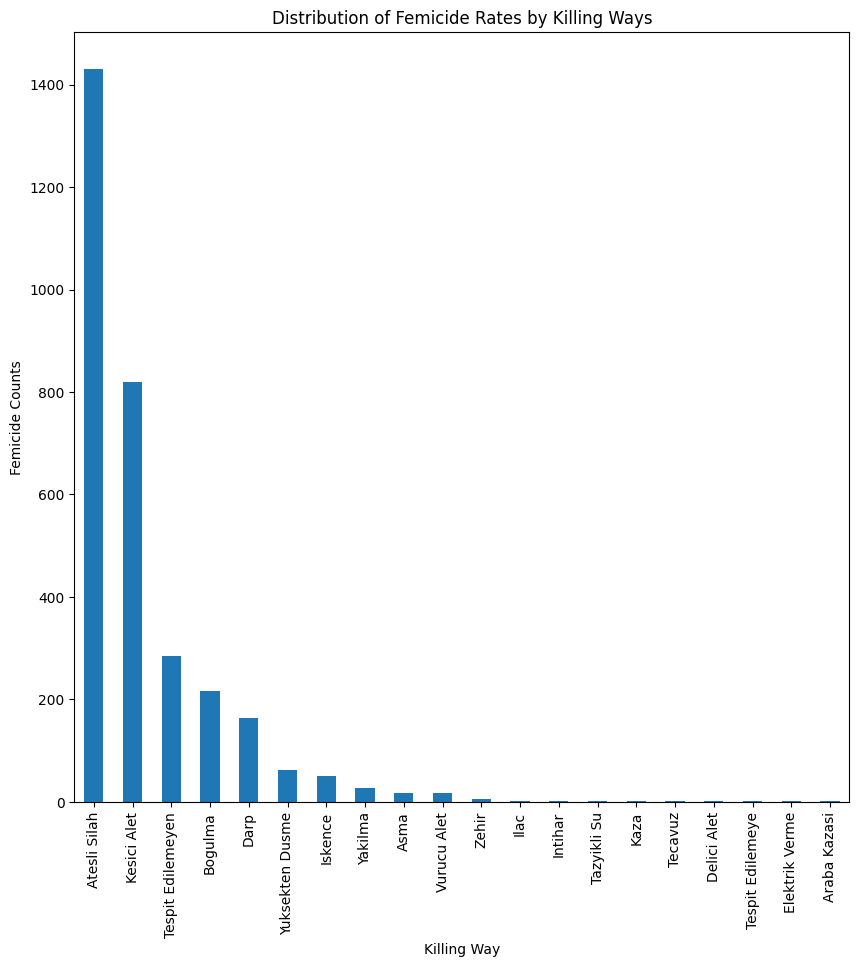

In [ ]:
# distribution of the Killing ways with plotting
killingway1 = df['killingway1'].value_counts().head(20)
plt.figure(figsize=(10, 10))
killingway1.plot.bar()
plt.xlabel('Killing Way')
plt.ylabel('Femicide Counts')
plt.title('Distribution of Femicide Rates by Killing Ways')
plt.show()

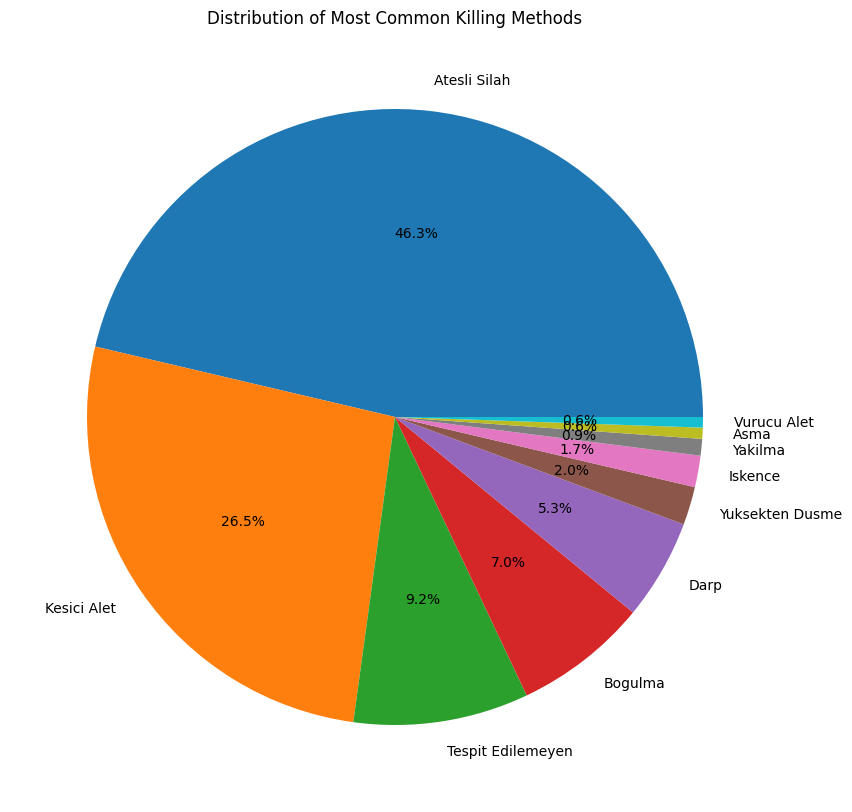

In [ ]:
# Compute the percentage of killing methods for each unique value in killingway1 with pie chart
most_frequent_killingways = df['killingway1'].value_counts().head(10)
#print(most_frequent_killingways)

killingway1_percentages = (most_frequent_killingways / df.shape[0]) * 100

plt.figure(figsize=(10,10))
plt.pie(killingway1_percentages, labels=killingway1_percentages.index, autopct='%1.1f%%')
plt.title("Distribution of Most Common Killing Methods")
plt.show()


0                     NaN
1                 Intihar
2                 Tutuklu
3                 Intihar
4       Tespit Edilemeyen
              ...        
3106              Tutuklu
3107                  NaN
3108                  NaN
3109              Tutuklu
3110    Tespit Edilemeyen
Name: statusofkiller, Length: 3106, dtype: object
Tutuklu               979
Tespit Edilemeyen     292
Intihar               235
Sorusturma Suruyor    121
Araniyor               88
Kacak                  37
Yargilaniyor            6
Serbest                 2
Sorusturma Suruuor      1
Tespit edilemeyen       1
Sorusturma suruyor      1
Name: statusofkiller, dtype: int64


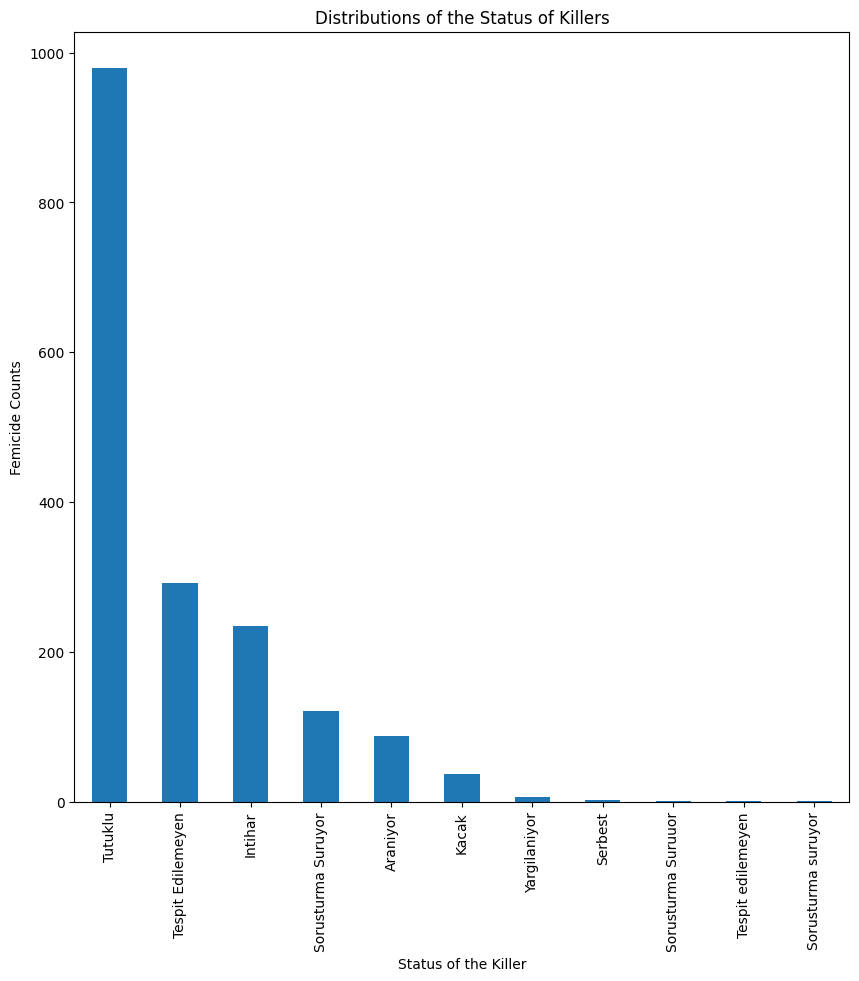

In [ ]:
# Compute the status of the killer
df['statusofkiller'] = df['statusofkiller'].str.strip()
print(df['statusofkiller'])

status_counts = df['statusofkiller'].value_counts()
print(status_counts)

plt.figure(figsize=(10, 10))
status_counts.plot.bar()
plt.xlabel('Status of the Killer')
plt.ylabel('Femicide Counts')
plt.title('Distributions of the Status of Killers')
plt.show()

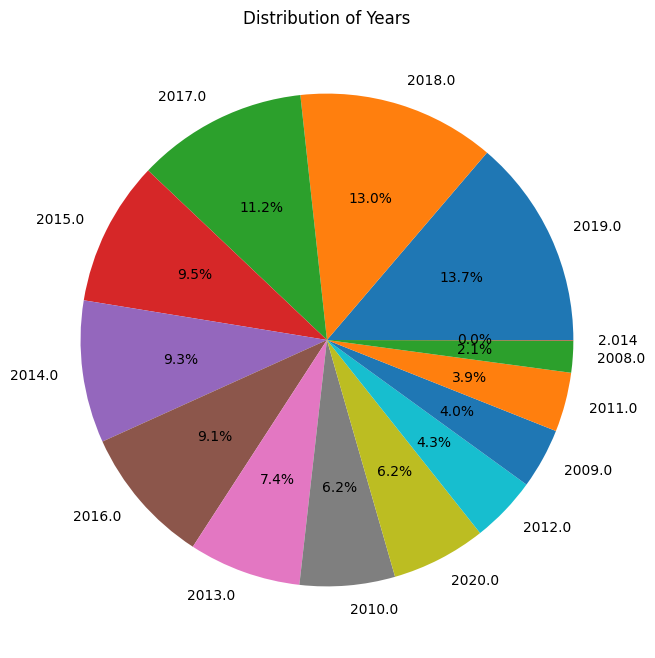

In [ ]:
year_counts = df['year'].value_counts()

df = df[df['year'] != 2.014]
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Years')

# Displaying the chart
plt.show()

COMPARISON OF THE WEBSCRAPED DATA

Selenay Buse Batıbay

In [ ]:
path = "/content/export_dataframe.csv"
exported_df = pd.read_csv(path, dtype={'age': str})

print("number of rows:", exported_df.shape[0])
print("number of columns:", exported_df.shape[1])


number of rows: 81
number of columns: 9


In [ ]:
exported_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City_name     81 non-null     object 
 1   A             81 non-null     object 
 2   B             80 non-null     object 
 3   Ekonomi       81 non-null     object 
 4   Saglik        81 non-null     object 
 5   Kent_hayati   81 non-null     object 
 6   Egitim        80 non-null     float64
 7   Guvenlik      80 non-null     float64
 8   Kultur_sanat  79 non-null     float64
dtypes: float64(3), object(6)
memory usage: 5.8+ KB


In [ ]:
for column in exported_df.columns:
  print(column)

City_name
A
B
Ekonomi
Saglik
Kent_hayati
Egitim
Guvenlik
Kultur_sanat


In [ ]:
exported_df = exported_df.drop(['A', 'B'], axis=1)

In [ ]:
exported_df.head(10)

,City_name,Ekonomi,Saglik,Kent_hayati,Egitim,Guvenlik,Kultur_sanat
0,ADANA,8,12,41,58.0,24.0,71.0
1,ADIYAMAN,54,75,14,65.0,30.0,72.0
2,AĞRI,71,78,79,78.0,14.0,81.0
3,AFYONKARAHİSAR,46,35,67,53.0,32.0,68.0
4,AKSARAY,51,58,76,56.0,58.0,31.0
5,AMASYA,15,44,60,24.0,NaN,65.0
6,ANKARA,2,9,71,1.0,25.0,11.0
7,ANTALYA,5,55,1,18.0,46.0,3.0
8,ARDAHAN,47,*,*,63.0,33.0,NaN
9,ARTVİN,19,15,2,20.0,10.0,13.0


SARP KIZILKAYA


In [ ]:
#manuelly writing data since it is missed in dataframe

exported_df.loc[exported_df['City_name'] == 'KARS', 'Ekonomi'] = str(62)

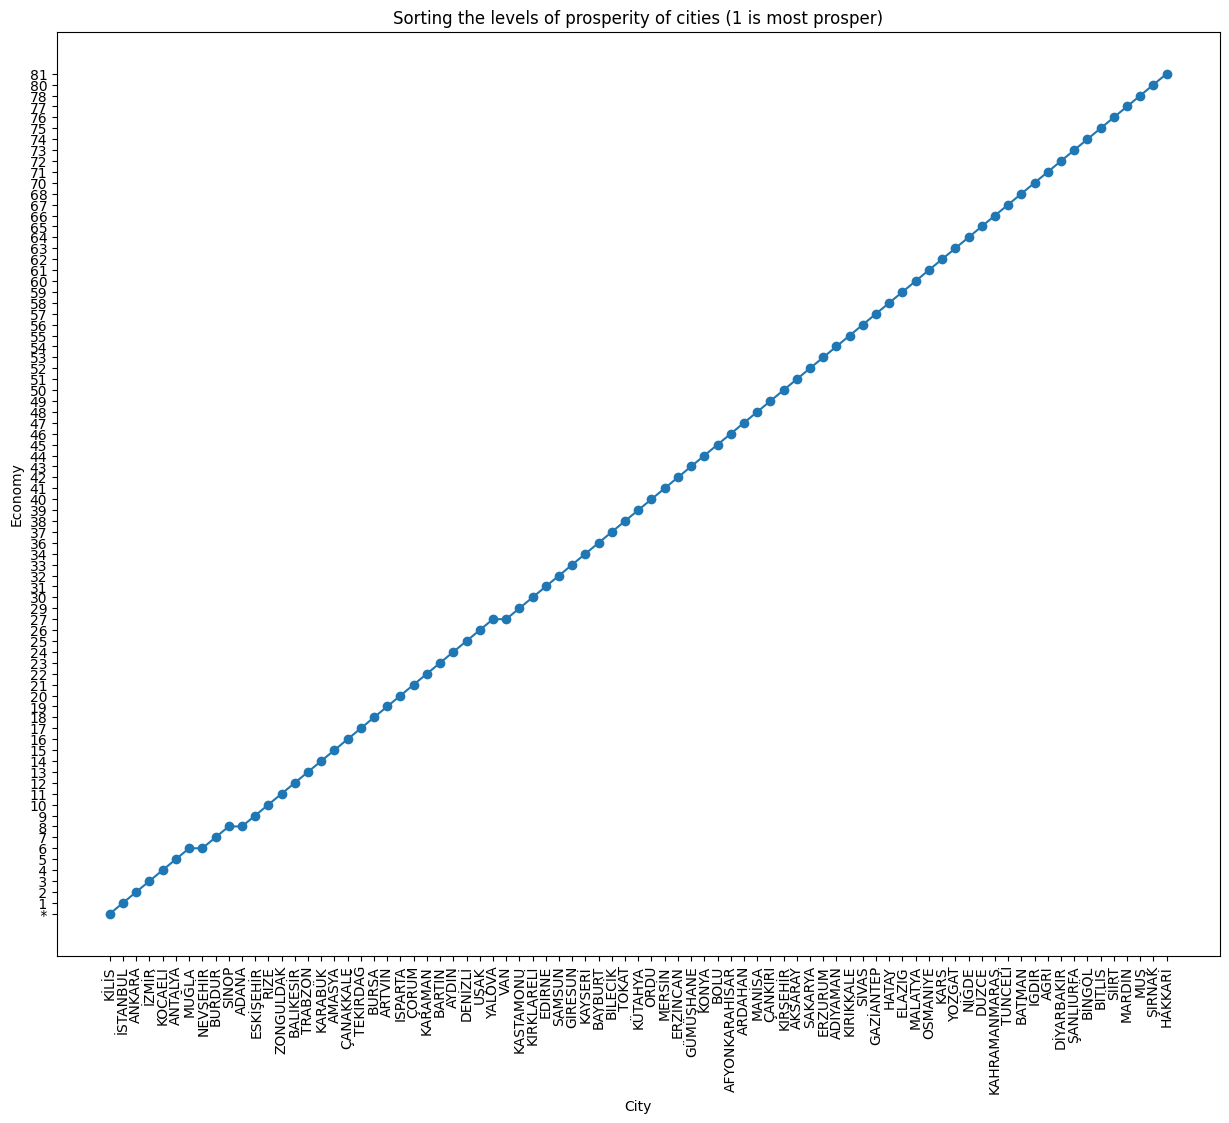

In [ ]:
exported_df = exported_df.sort_values(by='Ekonomi')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Ekonomi'], marker='o')
plt.xlabel('City')
plt.ylabel('Economy')
plt.title("Sorting the levels of prosperity of cities (1 is most prosper)")
plt.xticks(rotation=90)
plt.show()


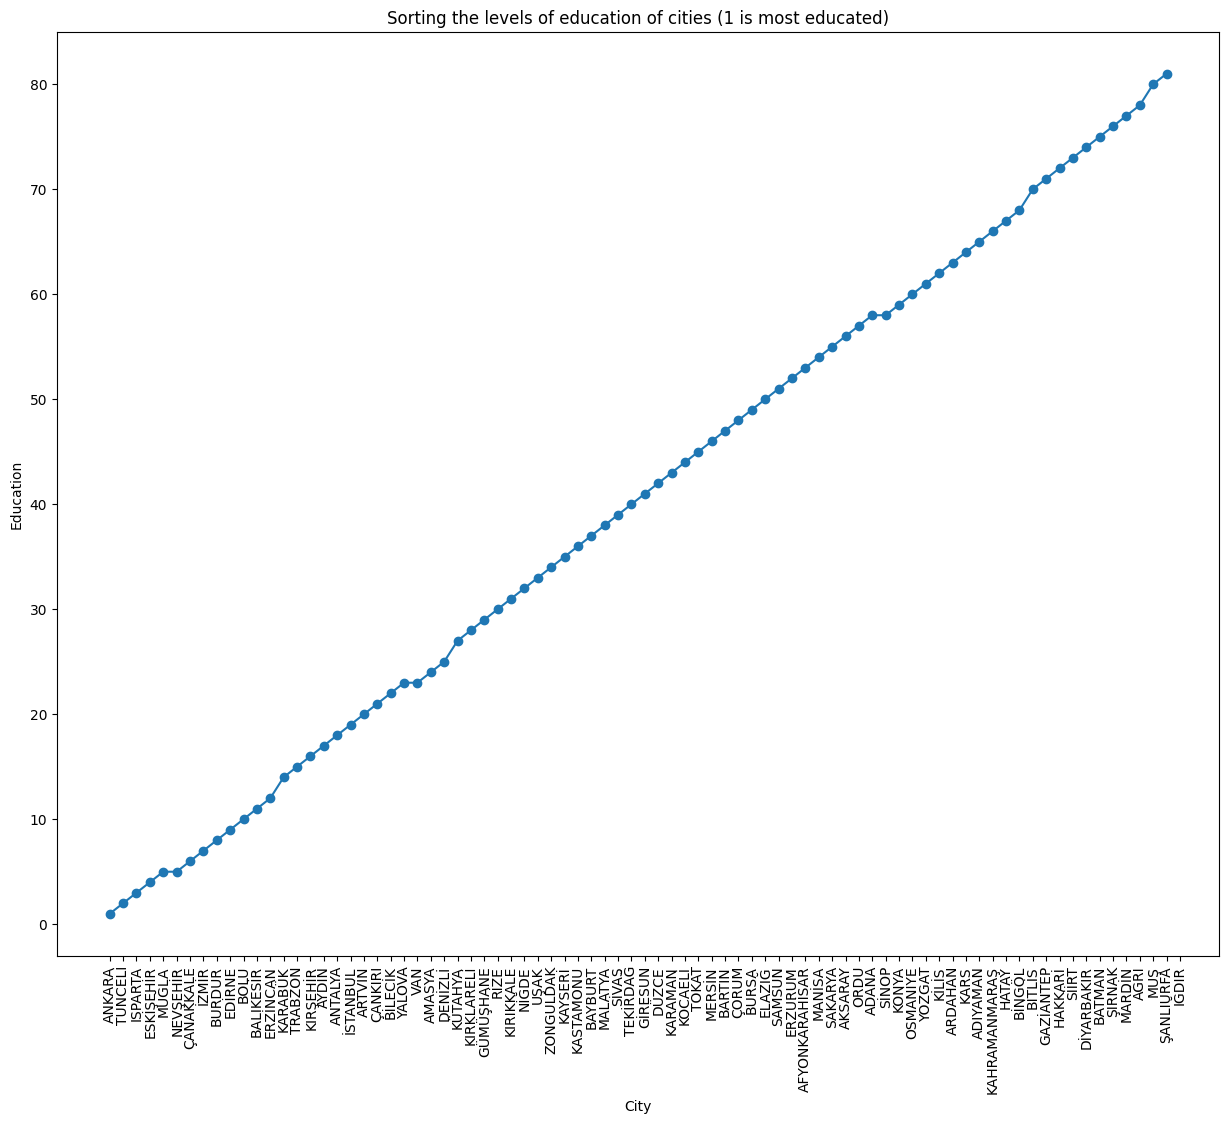

In [ ]:
exported_df = exported_df.sort_values(by='Egitim')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Egitim'], marker='o')
plt.xlabel('City')
plt.ylabel('Education')
plt.title("Sorting the levels of education of cities (1 is most educated)")
plt.xticks(rotation=90)
plt.show()


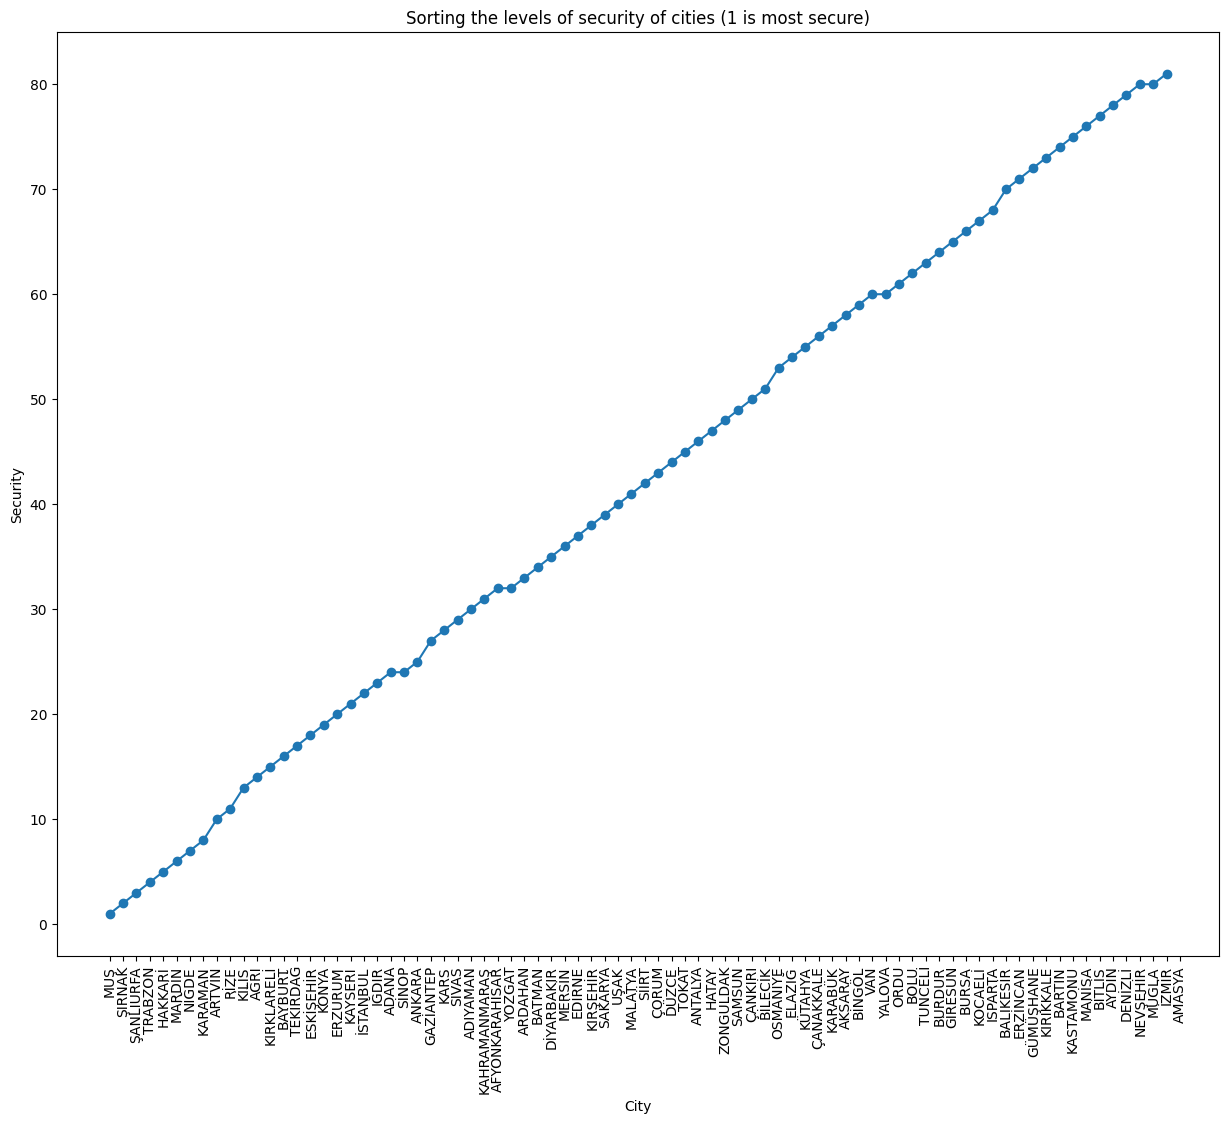

In [ ]:
exported_df = exported_df.sort_values(by='Guvenlik')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Guvenlik'], marker='o')
plt.xlabel('City')
plt.ylabel('Security')
plt.title("Sorting the levels of security of cities (1 is most secure)")
plt.xticks(rotation=90)
plt.show()


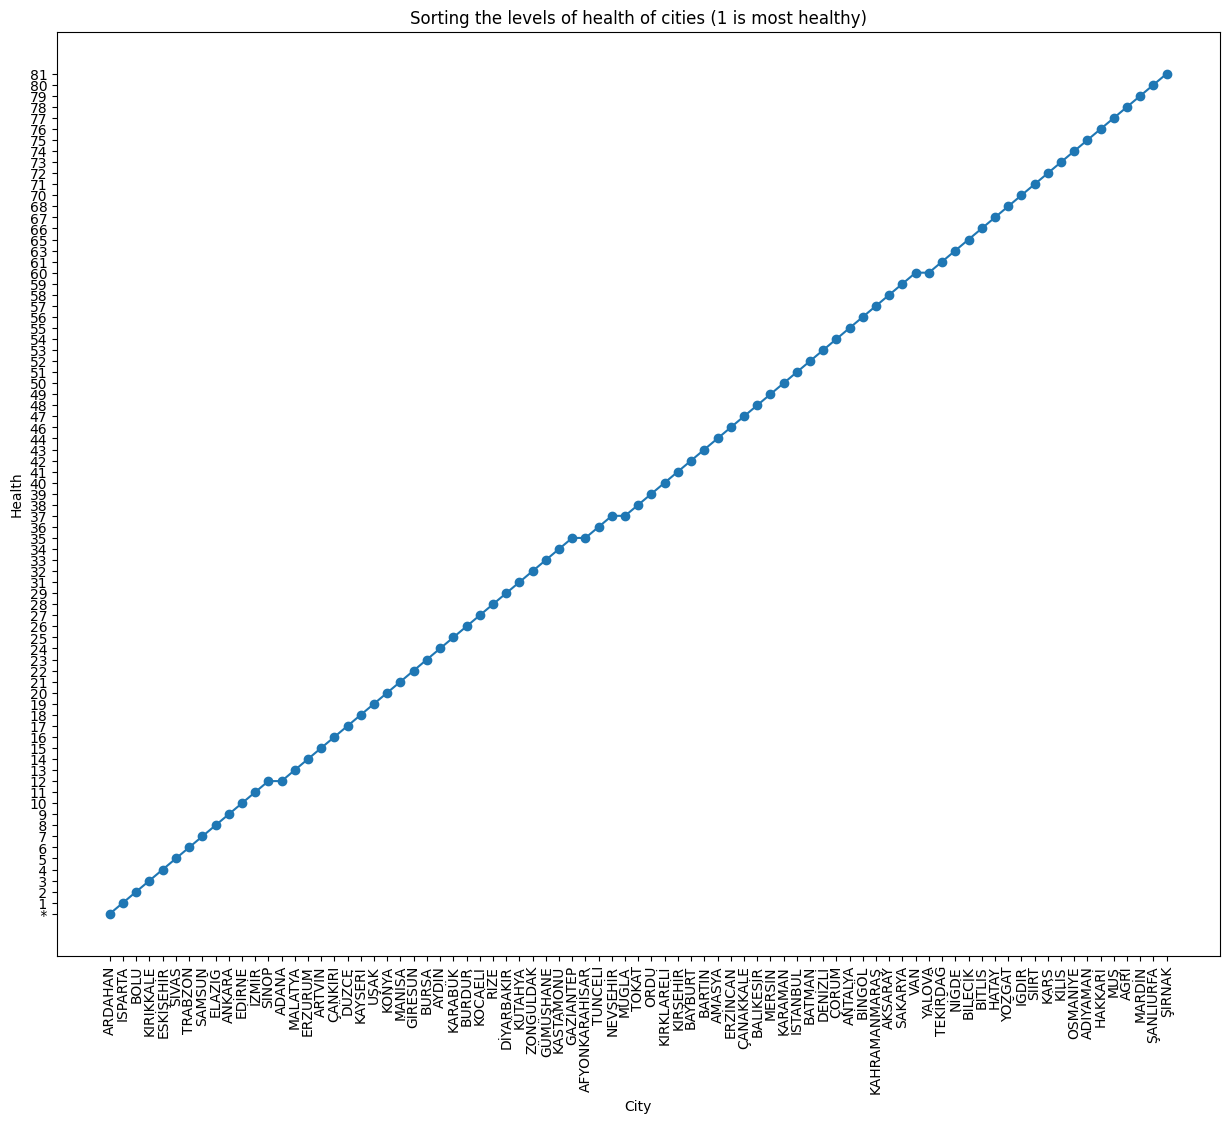

In [ ]:
exported_df = exported_df.sort_values(by='Saglik')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Saglik'], marker='o')
plt.xlabel('City')
plt.ylabel('Health')
plt.title("Sorting the levels of health of cities (1 is most healthy)")
plt.xticks(rotation=90)
plt.show()


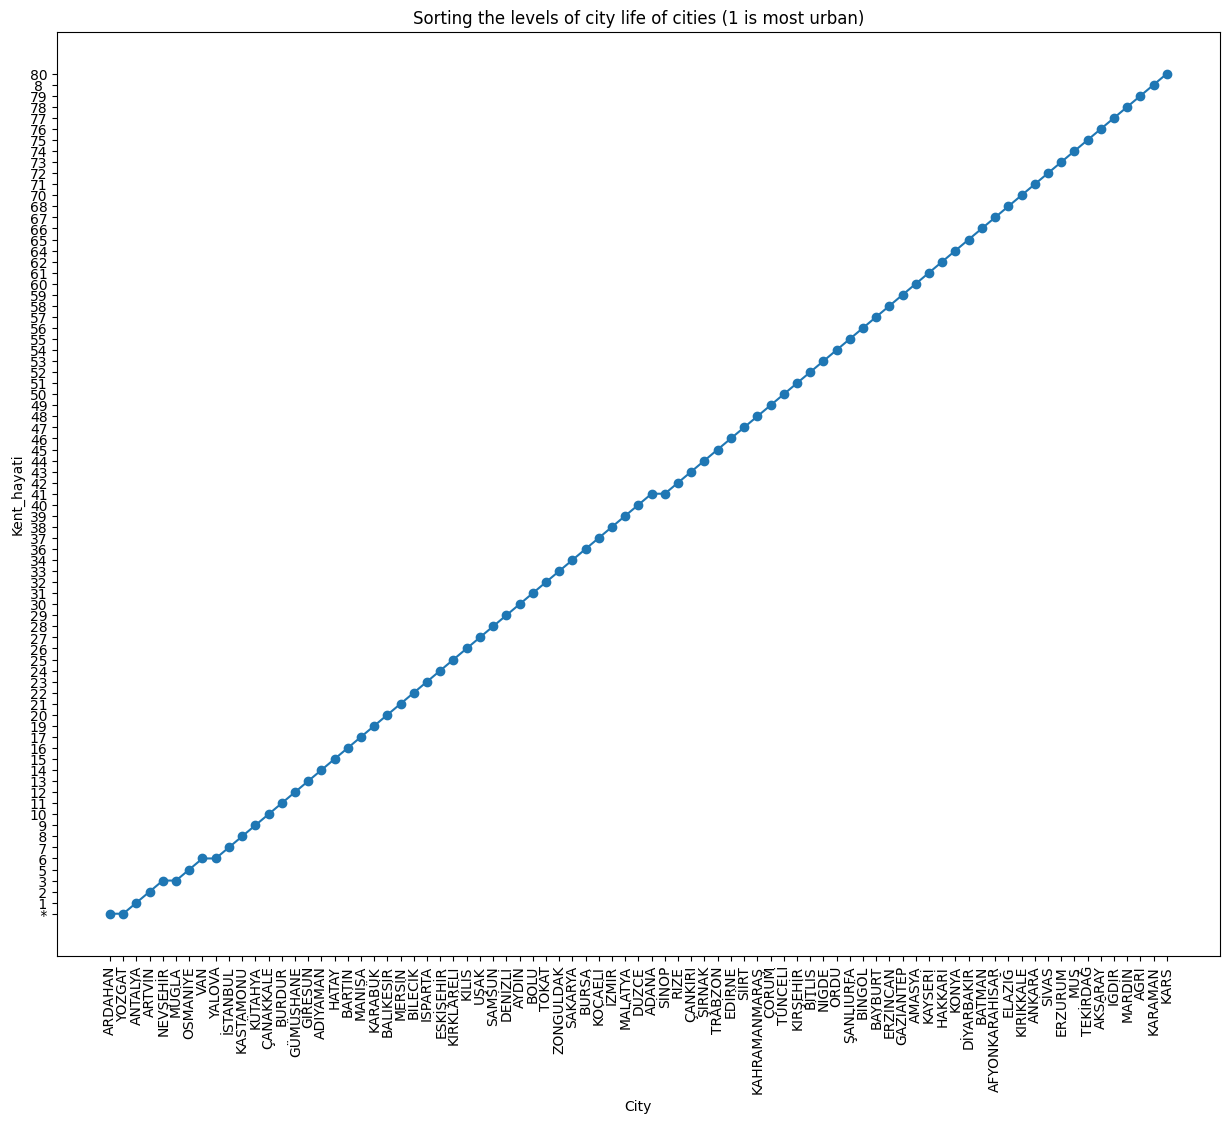

In [ ]:
exported_df = exported_df.sort_values(by='Kent_hayati')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Kent_hayati'], marker='o')
plt.xlabel('City')
plt.ylabel('Urban Life')
plt.title("Sorting the levels of city life of cities (1 is most urban)")
plt.xticks(rotation=90)
plt.show()


CONCLUDING THE HYPOTHESES by Mine Ergin

HYPOTHESIS 1: MORE THAN 30% OF THE FEMICIDE HAPPENS IN SOUTHEASTERN REGION OF TURKEY

In [248]:
guneydogu_anadolu_femicides_percentage = (df[df['region'] == 'Guneydogu Anadolu'].shape[0] / df.shape[0]) * 100

print("Percentage of femicides in Southeastern Anatolian region: {:.2f}%".format(guneydogu_anadolu_femicides_percentage))

if guneydogu_anadolu_femicides_percentage > 30:
    print("The hypothesis is supported.")
else:
    print("The hypothesis is not supported.")

print("For further information, you can skim the charts in part 3")

Percentage of femicides in Southeastern Anatolian region: 6.15%
The hypothesis is not supported.
For further information, you can skim the charts in part 3


Hypothesis 2: More than 50% of femicides in Turkey between 2008-2020 are women under the age of 18.

In [249]:
under_18_count = df[df['age'] == 'Resit Degil'].shape[0]

under_18_percentage = (under_18_count / df.shape[0]) * 100

if under_18_percentage > 50:
    print("The hypothesis is supported.")
else:
    print("The hypothesis is not supported.")

print("Percentage of murdered women who are under 18 : {:.2f}%".format(under_18_percentage))
print("For further information, you can skim the charts in part 3")

The hypothesis is not supported.
Percentage of murdered women who are under 18 : 0.87%
For further information, you can skim the charts in part 3


Research Question: What percentage of married women in Turkey who are murdered are killed by their husbands in the period of 2008-2020.

In [250]:
married_women_killed_by_husbands_percentage = (df[ (df['killer1'] == 'Kocasi')].shape[0] / df.shape[0]) * 100
print("Percentage of married women killed by their husbands:", married_women_killed_by_husbands_percentage)
print("For further information, you can skim the charts in part 3")

Percentage of married women killed by their husbands: 33.107890499194845
For further information, you can skim the charts in part 3


HYPOTHESIS 4: ECONOMY LEVEL AND FEMICIDE RATES ARE STRONGLY CORRELATED 

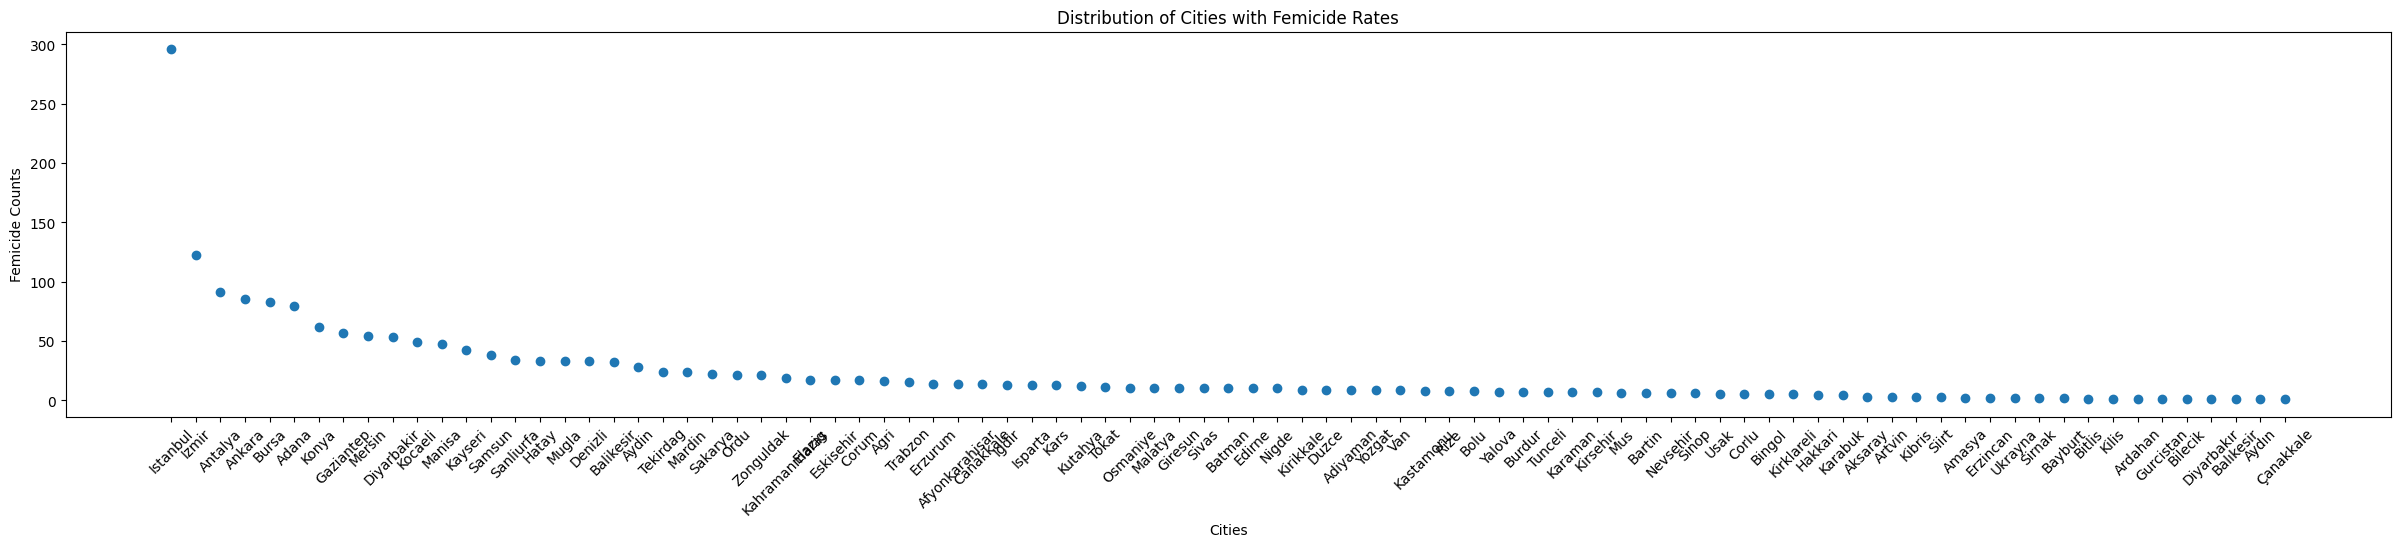

In [251]:
# distribution of the cities that has the most femicide rate
# plot of femicide level
city_counts = df['city'].value_counts()
plt.figure(figsize=(30, 5))
plt.scatter(city_counts.index, city_counts.values)
plt.xlabel('Cities')
plt.ylabel('Femicide Counts')
plt.title('Distribution of Cities with Femicide Rates')
plt.xticks(rotation=45)
plt.show()

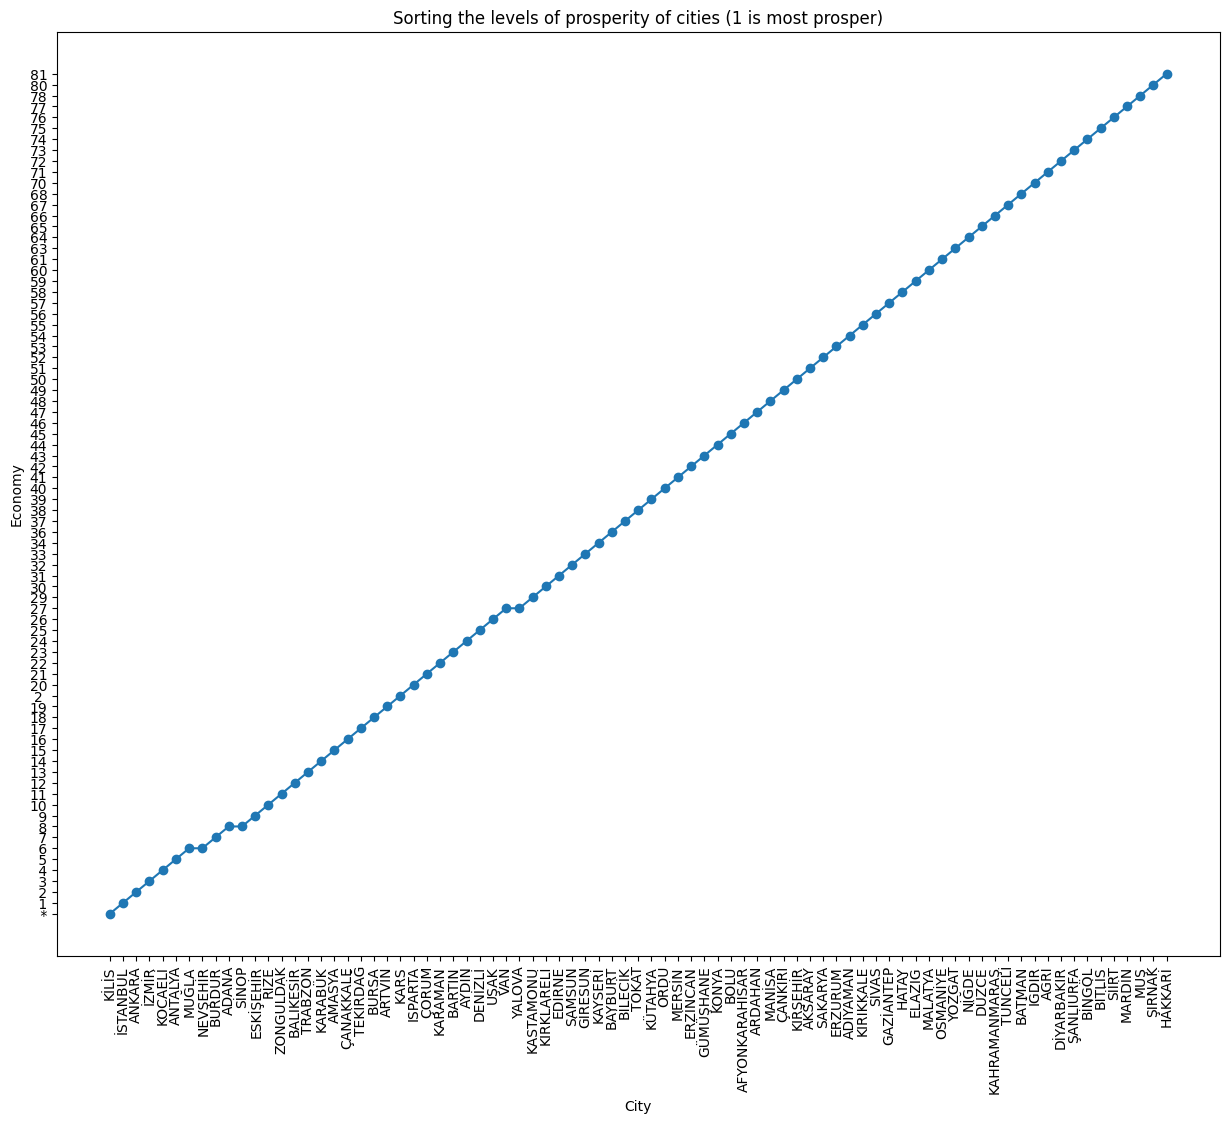

In [252]:
# plot of economy levels

exported_df = exported_df.sort_values(by='Ekonomi')

fig, ax = plt.subplots(figsize=(15, 12))

plt.plot(exported_df['City_name'], exported_df['Ekonomi'], marker='o')
plt.xlabel('City')
plt.ylabel('Economy')
plt.title("Sorting the levels of prosperity of cities (1 is most prosper)")
plt.xticks(rotation=90)
plt.show()